In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2
from matplotlib_venn import venn2, venn3, venn3_circles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_colwidth', 0)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

In [3]:
functions_archaea = pd.read_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation.csv',
           sep='\t')

In [4]:
functions_bac = pd.read_csv(analysis+'/intermediate_results/bacteria_kegg_gut_functions_annotation.csv',
           sep='\t')

this is a view on overlap of KEGG ids between archaea and bacteria in the gut 

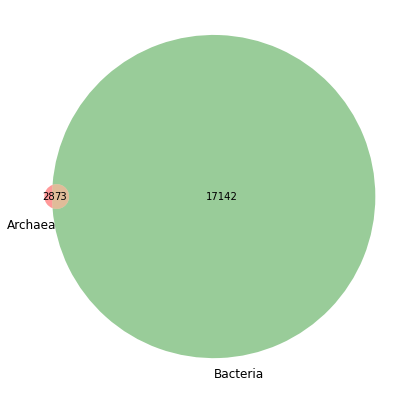

In [5]:
plt.figure(figsize=(7,7))
arch = set(functions_archaea.id.unique())
bac = set(functions_bac.id.unique())

venn2([arch, bac], ('Archaea', 'Bacteria'))
plt.show()

In [6]:
common_functions = pd.DataFrame(list(arch & bac), columns=['id'])\
.merge(functions_archaea, on='id')
common_functions # annotated as archaea

id                      protein  cluster  \
0     K02369  GUT_GENOME023085.fasta_941   159495    
1     K02369  GUT_GENOME195804.fasta_1267  159495    
2     K02369  GUT_GENOME242964.fasta_1380  159495    
3     K02369  GUT_GENOME006755.fasta_1375  159495    
4     K02369  GUT_GENOME205550.fasta_1075  159495    
...      ...                          ...     ...    
1142  K24187  GUT_GENOME163187.fasta_183   103470    
1143  K24187  GUT_GENOME118492.fasta_2684  103470    
1144  K19212  GUT_GENOME239182.fasta_760   121579    
1145  K19212  GUT_GENOME143264.fasta_388   121579    
1146  K19212  GUT_GENOME170699.fasta_767   121579    

                                          description  count_x  count_y  
0     alpha-1,4-N-acetylglucosaminyltransferase EXTL2  38       38       
1     alpha-1,4-N-acetylglucosaminyltransferase EXTL2  38       38       
2     alpha-1,4-N-acetylglucosaminyltransferase EXTL2  38       38       
3     alpha-1,4-N-acetylglucosaminyltransferase EXTL2  38       38       
4     alpha-1,4-N-acetylglucosaminyltransferase EXTL2  38       38       
...                                               ...  ..       ..       
1142  cytochrome P450 family 89 subfamily A9           2        2        
1143  cytochrome P450 family 89 subfamily A9           2        2        
1144  beta-lactamase class D OXA-63                    3        3        
1145  beta-lactamase class D OXA-63                    3        3        
1146  beta-lactamase class D OXA-63                    3        3        

[1147 rows x 6 columns]

In [7]:
functions_archaea[~functions_archaea.id.isin(common_functions['id'].unique())].id.nunique()

28

👆28 kegg ids and 44 protein families

*just in case*

to find all uncommon kegg ids:

In [8]:
# arch = functions_archaea.id.unique()
# bac = functions_bac.id.unique()

# # union of the series
# union = pd.Series(np.union1d(arch, bac))
  
# # intersection of the series
# intersect = pd.Series(np.intersect1d(arch, bac))
  
# # uncommon elements in both the series 
# notcommonseries = union[~union.isin(intersect)]
# notcommonseries

In [9]:
uncommon_fuctions = functions_archaea[~functions_archaea.id.isin(common_functions['id'].unique())]
uncommon_fuctions

protein  cluster      id  \
782   GUT_GENOME193092.fasta_1493  58594    K20411   
783   GUT_GENOME193975.fasta_1035  58594    K20411   
784   GUT_GENOME269779.fasta_606   58594    K20411   
785   GUT_GENOME137665.fasta_751   58594    K20411   
786   GUT_GENOME030002.fasta_181   58594    K20411   
...                          ...     ...       ...   
1336  GUT_GENOME066253.fasta_385   47950    K22427   
1337  GUT_GENOME162548.fasta_1257  135980   K04966   
1338  GUT_GENOME259597.fasta_1045  135980   K04966   
1341  GUT_GENOME132203.fasta_1680  119654   K04402   
1342  GUT_GENOME140888.fasta_878   119654   K04402   

                                                           description  \
782   proline-rich protein 5                                             
783   proline-rich protein 5                                             
784   proline-rich protein 5                                             
785   proline-rich protein 5                                             
786   proline-rich protein 5                                             
...                      ...                                             
1336  phenylalanine decarboxylase                                        
1337  transient receptor potential cation channel subfamily C member 3   
1338  transient receptor potential cation channel subfamily C member 3   
1341  growth arrest and DNA-damage-inducible protein                     
1342  growth arrest and DNA-damage-inducible protein                     

      count_x  count_y  
782   73       73       
783   73       73       
784   73       73       
785   73       73       
786   73       73       
...   ..       ..       
1336  2        2        
1337  2        2        
1338  2        2        
1341  2        2        
1342  2        2        

[200 rows x 6 columns]

In [10]:
uncommon_fuctions['cluster'] = 'a_' + uncommon_fuctions['cluster'].astype(str)

<ipython-input-10-1e2fe5c30618>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncommon_fuctions['cluster'] = 'a_' + uncommon_fuctions['cluster'].astype(str)


In [11]:
# uncommon_fuctions.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/uncommon_functions.csv',
#                         index=False, sep='\t')

In [12]:
# uncommon_fuctions[['protein', 'cluster']].to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_clusters_uncommon_functions.csv',
#                         index=False, sep='\t', header=None)